# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


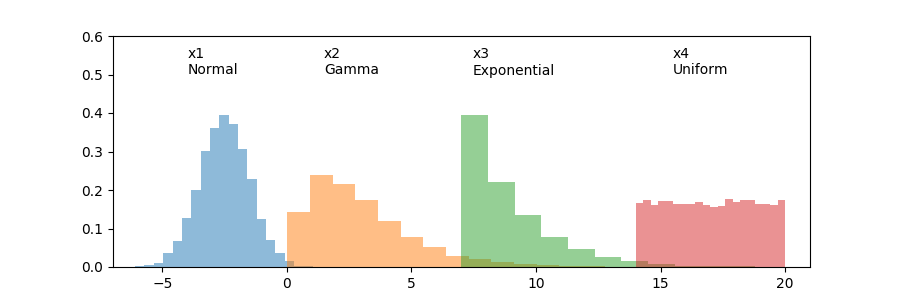

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


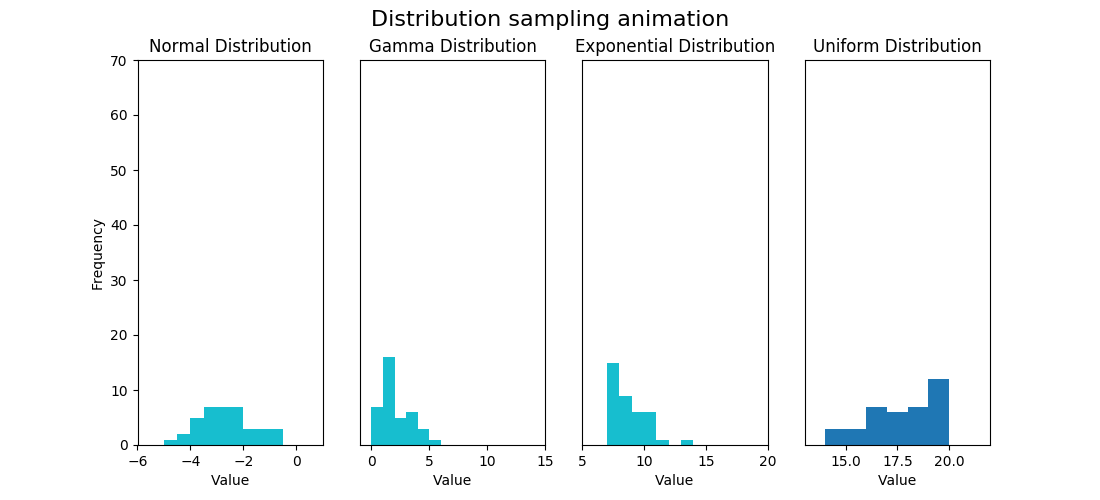

In [3]:
n = 100

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    
    ax1.hist(x1[:curr], bins=bins1)
    
    ax2.hist(x2[:curr], bins=bins2)
    
    ax3.hist(x3[:curr], bins=bins3)
    
    bins4 = np.arange(12, 21, 1)
    ax4.set_title('Uniform Distribution')
    #ax4.set_ylabel('Frequency')
    ax4.set_xlabel('Value')
    ax4.axis([13,22,0,70])
    ax4.hist(x4[:curr], bins=bins4)
    ax4.set_yticks([])
    
fig1, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, nrows=1, figsize=(11,5))

bins1 = np.arange(-6, 1, 0.5)
ax1.set_title('Normal Distribution')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Value')
ax1.axis([-6,1,0,70])

bins2 = np.arange(-1, 15, 1)
ax2.set_title('Gamma Distribution')
#ax2.set_ylabel('Frequency')
ax2.set_xlabel('Value')
ax2.axis([-1,15,0,70])
ax2.set_yticks([])

bins3 = np.arange(4, 21, 1)
ax3.set_title('Exponential Distribution')
#ax3.set_ylabel('Frequency')
ax3.set_xlabel('Value')
ax3.axis([5,20,0,70])
ax3.set_yticks([])

bins4 = np.arange(12, 21, 1)
ax4.set_title('Uniform Distribution')
#ax4.set_ylabel('Frequency')
ax4.set_xlabel('Value')
ax4.axis([13,22,0,70])
ax4.set_yticks([])

fig1.suptitle('Distribution sampling animation', fontsize=16)

a = animation.FuncAnimation(fig1, update, interval=1)